In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

### MNIST dataset

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data() # Data loading
x_train, x_test = x_train/255.0 , x_test/255.0 #Normalizing the data

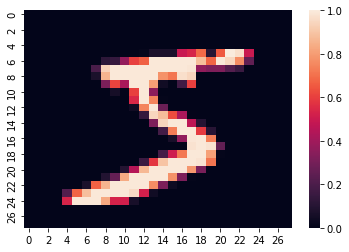

In [27]:
sns.heatmap(x_train[0])
plt.show()

#### Prepearing the model

In [11]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(10)
])

In [12]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.40410277, -0.46030605, -0.6388068 ,  0.24000591,  0.32878405,
         0.5329246 , -0.21563345,  0.71689916, -0.16056764,  0.03700624]],
      dtype=float32)

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.06105226, 0.05771557, 0.04828043, 0.11626115, 0.12705462,
        0.15582873, 0.0737145 , 0.18730384, 0.07788749, 0.09490147]],
      dtype=float32)

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
model.compile(optimizer="adam", loss = loss_fn, metrics=["accuracy"])

In [16]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2981 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1442 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1081 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0880 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0741 - accuracy: 0.9770


In [17]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0867 - accuracy: 0.9749 - 787ms/epoch - 3ms/step


[0.08666389435529709, 0.9749000072479248]

#### Validation of Model

In [21]:
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=200)

Epoch 1/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.0669 - val_accuracy: 0.9808
Epoch 2/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0664 - val_accuracy: 0.9805
Epoch 3/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0672 - val_accuracy: 0.9809
Epoch 4/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0638 - val_accuracy: 0.9812
Epoch 5/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.0656 - val_accuracy: 0.9811


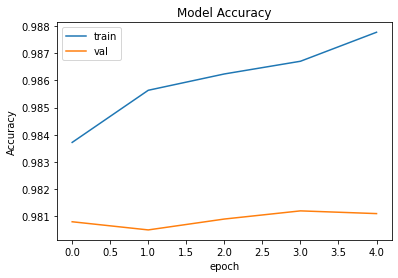

In [24]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()